In [1]:
import astropy.io.fits as fits
import numpy as np
from scipy.integrate import quad
import scipy.integrate as integrate
from scipy.optimize import curve_fit
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.table import Table, join
import os
import matplotlib.pyplot as plt
from astropy.cosmology import FlatLambdaCDM
import halomod as hm
import hmf
import treecorr

/home/astro/manasoi7/.conda/envs/project/lib/python3.12/site-packages/halomod/halo_model.py:32: UserWarning: Warning: Some Halo-Exclusion models have significant speedup when using Numba
  from .halo_exclusion import NoExclusion


In [2]:
import DarkVerse as dv


In [3]:

# Define the home directory
home_dir = os.path.expanduser('~')
thesis_path = os.path.join(home_dir, 'Master_Thesis', 'DATA')

# Load Catalog Data
fits_file_path = os.path.join(thesis_path, "Y3_deep_fields_DB_wKNN_cat_COSMOS_zm.fits")  
t = Table.read(fits_file_path)

masked_file_path = os.path.join(thesis_path, "COSMOS_masked_cat.fits")  
t3 = Table.read(masked_file_path)

# Join tables on 'id'
t = join(t, t3, keys='id')
t.rename_column('ra_1', 'ra')
t.rename_column('dec_1', 'dec')

# Load Randoms
fits_random = os.path.join(thesis_path, "COSMOS_randoms_ugriz_trim_video.fits") 
t2 = Table.read(fits_random)
randoms = t2  # Random catalog

# Define Correlation Function Configuration
config = {
    'min_sep': 0.003,
    'max_sep': 1.78,
    'bin_size': 0.1,
    'sep_units': 'degrees',
    'var_method': 'bootstrap'
}

z_min=0.2
z_max=0.4
SM_min=8
SM_max=9

# Select Subsample
subsample = dv.Subsample(catalog=t, randoms=randoms, z_min=z_min, z_max=z_max, SM_min=SM_min, SM_max=SM_max, config=config)

# Get Results
results = subsample.get_results()

print(f"Power Law Parameters (A, gamma): {results['power_law_params']}")
print(f"w_theta: {results['w_theta']}")
print(f"DD counts: {results['dd_counts']}")
print(f"DR counts: {results['dr_counts']}")
print(f"RR counts: {results['rr_counts']}")


/home/astro/manasoi7/.conda/envs/project/lib/python3.12/site-packages/hmf/density_field/transfer_models.py:233: UserWarning: 'extrapolate_with_eh' was not set. Defaulting to True, which is different behaviour than versions <=3.4.4. This warning may be removed in v4.0. Silence it by setting extrapolate_with_eh explicitly.
  warnings.warn(
/home/astro/manasoi7/.conda/envs/project/lib/python3.12/site-packages/halomod/halo_model.py:784: UserWarning: You are using an un-normalized mass function and bias function pair.Bias Tinker10 has the following paired HMF model: (). Matter correlations are not well-defined.
  tools.norm_warn(self)


Power Law Parameters (A, gamma): [0.00782208 0.51811478]
w_theta: [ 0.0305365   0.1307683   0.05437034  0.21780999  0.04263886  0.23960974
  0.16455705  0.19958733  0.19957638  0.0935727   0.04765672  0.08691768
  0.02983113  0.13578856  0.10502702  0.07552468  0.09945409  0.03073077
  0.07736296  0.02923148  0.05810761  0.06262713  0.05148175  0.00827002
  0.0226354   0.05605917  0.02291878  0.03578425  0.05087886  0.03090327
  0.04346365  0.0339065   0.02087548  0.0286794   0.02349703  0.02070787
  0.01237292  0.024702    0.01577912  0.01409567  0.0104925   0.01149966
 -0.00074094  0.00907031  0.01111158  0.00959227  0.0025379   0.00837529
  0.00267413  0.00605301 -0.00103633  0.00038332 -0.00340884 -0.00675362
 -0.00810343 -0.00476732 -0.00380823 -0.00911799 -0.00300183 -0.00447452
  0.00794295  0.00890016 -0.00244006 -0.01549841]
DD counts: [6.90000e+01 9.00000e+01 1.01000e+02 1.40000e+02 1.45000e+02 2.06000e+02
 2.33000e+02 2.89000e+02 3.44000e+02 3.81000e+02 4.37000e+02 5.41000e+

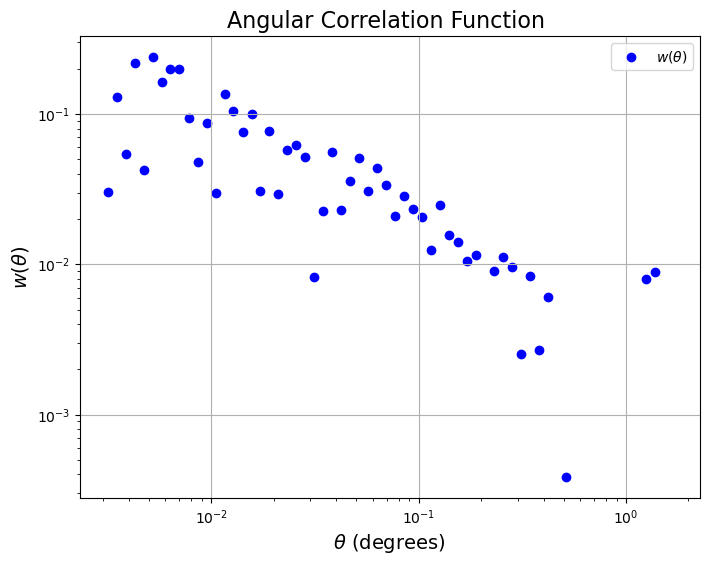

In [4]:

theta_values = results['theta']
w_theta_values = results['w_theta']

plt.figure(figsize=(8, 6))
plt.scatter(theta_values, w_theta_values, label=r'$w(\theta)$', color='blue')

plt.xlabel(r'$\theta$ (degrees)', fontsize=14)
plt.ylabel(r'$w(\theta)$', fontsize=14)
plt.title('Angular Correlation Function ', fontsize=16)

plt.xscale('log')
plt.yscale('log')

plt.legend()
plt.grid(True)
plt.show()


In [8]:
gg = subsample.compute_gg()  # Call the method inside the class


matter_correlation = gg.angular_corr_matter  # Matter-matter correlation
galaxy_correlation = gg.angular_corr_gal  # Galaxy-galaxy correlation


AttributeError: 'NoneType' object has no attribute 'angular_corr_matter'